# 题目

给你一个字符串 s 和一个字符规律 p，请你来实现一个支持 '.' 和 '*' 的正则表达式匹配。

'.' 匹配任意单个字符
'*' 匹配零个或多个前面的那一个元素
所谓匹配，是要涵盖 整个 字符串 s的，而不是部分字符串

# 算法思想

<font color=red size=5> 核心：递归，动态规划 </font>    
步骤：   

题目中的匹配是一个「逐步匹配」的过程：我们每次从字符串 ppp 中取出一个字符或者「字符 + 星号」的组合，并在 sss 中进行匹配。对于 ppp 中一个字符而言，它只能在 sss 中匹配一个字符，匹配的方法具有唯一性；而对于 ppp 中字符 + 星号的组合而言，它可以在 sss 中匹配任意自然数个字符，并不具有唯一性。因此我们可以考虑使用动态规划，对匹配的方案进行枚举。

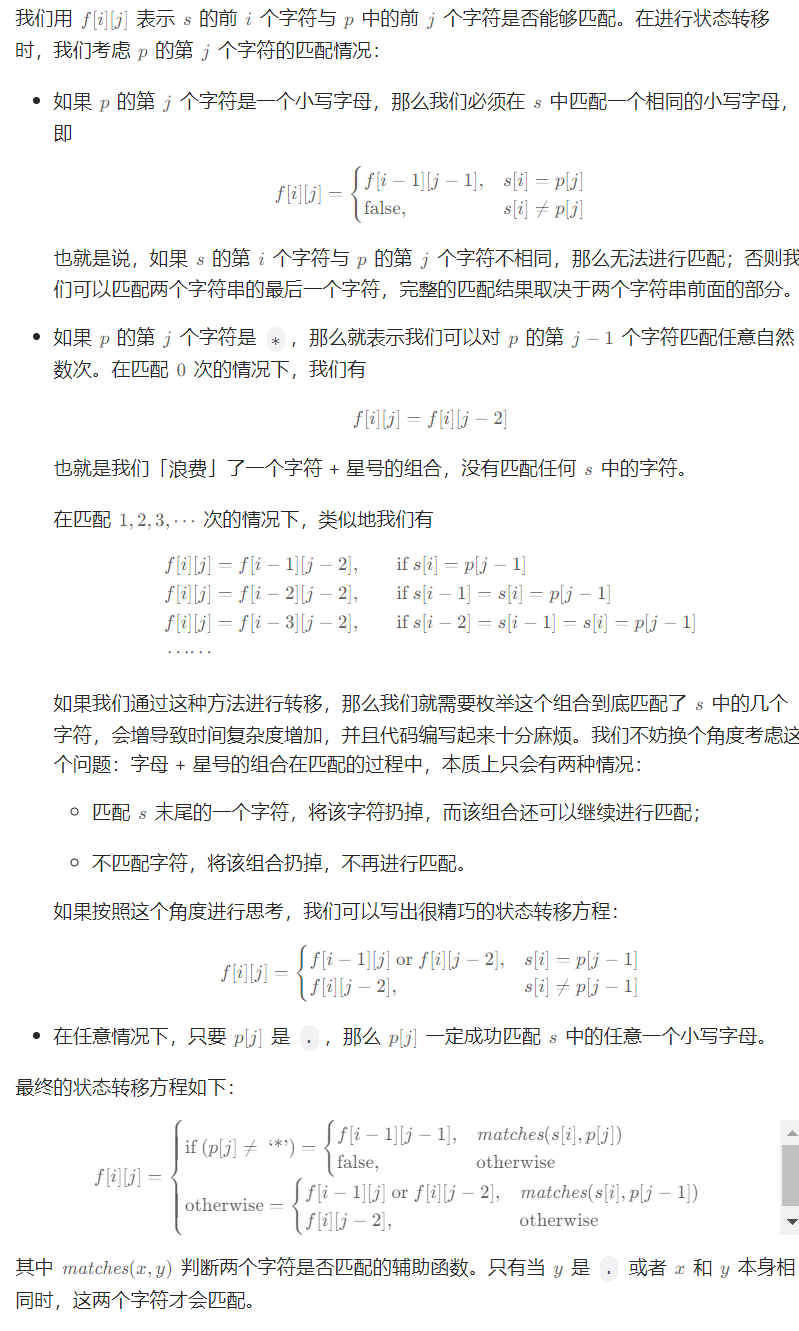


# 代码实现

In [ ]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        m, n = len(s), len(p)

        def matches(i: int, j: int) -> bool:
            if i == 0:
                return False
            if p[j - 1] == '.':
                return True
            return s[i - 1] == p[j - 1]

        f = [[False] * (n + 1) for _ in range(m + 1)]
        f[0][0] = True
        for i in range(m + 1):
            for j in range(1, n + 1):
                if p[j - 1] == '*':
                    f[i][j] |= f[i][j - 2]
                    if matches(i, j - 1):
                        f[i][j] |= f[i - 1][j]
                else:
                    if matches(i, j):
                        f[i][j] |= f[i - 1][j - 1]
        return f[m][n]
